In [1]:
## Library

In [2]:
#Regex
import re

# Pandas
import pandas as pd

# Numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

# Ipython tool for figsize
from IPython.core.pylabtools import figsize

# train test split
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# XGB
import xgboost as xgb

# cross_val_score
from sklearn.model_selection import cross_val_score

# DataframeMapper, CategoricalImputer
from sklearn_pandas import DataFrameMapper, CategoricalImputer

# FeatureUnion
from sklearn.pipeline import FeatureUnion

# Function Transformer
from sklearn.preprocessing import FunctionTransformer

# Plot AUC *(Self Defined Package)
from metrics.roc_auc import roc_auc

# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve

# Methods to check for numeric or categorical data in a dataframe
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Resampling
from collections import Counter
from imblearn.over_sampling import SMOTE

# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [3]:
## Load data

In [4]:
# set display columns
pd.set_option('display.max_columns', 30)

In [5]:
# Load data
df = pd.read_csv('Final_NHANES20132014.csv', dtype = object)
df.head()

,SEQN,Gender,Age,Race1,Education,MaritalStatus,Poverty,Weight,Height,BMI,Pulse,BPSysAve,BPDiaAve,DirectChol,TotChol,UrineVol1,UrineFlow1,Diabetes,HealthGen,SleepHrsNight,SleepTrouble,PhysActive,Smoke100,mortstat
0,73557,Male,69,Black,High School,Separated,0.84,78.3,171.3,26.7,86,122,72,1.68,4.32,87,0.821,Diabetes_Yes,Vgood,7,SleepTrouble_Yes,PhysActive_No,Smoke100_Yes,Assumed Alive
1,73558,Male,54,White,High School,Married,1.78,89.5,176.8,28.6,74,156,62,1.29,4.4,90,1.636,Diabetes_Yes,Fair,9,SleepTrouble_No,PhysActive_Yes,Smoke100_Yes,Assumed Alive
2,73559,Male,72,White,Some College,Married,4.51,88.9,175.3,28.9,68,140,90,1.55,3.26,66,0.945309627023803,Diabetes_Yes,Good,8,SleepTrouble_No,PhysActive_Yes,Smoke100_Yes,Assumed Alive
3,73561,Female,73,White,College Grad,Married,5,52,162.4,19.7,92,136,86,2.2,5.2,5,0.109,Diabetes_No,Poor,9,SleepTrouble_No,PhysActive_Yes,Smoke100_No,Assumed Dead
4,73562,Male,56,Mexican,Some College,Divorced,4.79,105,158.7,41.7,60,160,84,0.98,5.84,197,1.187,Diabetes_No,Poor,5,SleepTrouble_No,PhysActive_No,Smoke100_Yes,Assumed Alive


In [6]:
df.drop(['SEQN'], axis=1, inplace=True)

In [7]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6100 entries, 0 to 6099
Data columns (total 23 columns):
Gender           6100 non-null object
Age              6100 non-null object
Race1            6100 non-null object
Education        6100 non-null object
MaritalStatus    6100 non-null object
Poverty          6100 non-null object
Weight           6100 non-null object
Height           6100 non-null object
BMI              6100 non-null object
Pulse            6100 non-null object
BPSysAve         6100 non-null object
BPDiaAve         6100 non-null object
DirectChol       6100 non-null object
TotChol          6100 non-null object
UrineVol1        6100 non-null object
UrineFlow1       6100 non-null object
Diabetes         6100 non-null object
HealthGen        6100 non-null object
SleepHrsNight    6100 non-null object
SleepTrouble     6100 non-null object
PhysActive       6100 non-null object
Smoke100         6100 non-null object
mortstat         6100 non-null object
dtypes: object(23)


In [8]:
# numerical columns
num_cols = ['Age', 'Poverty', 'Weight', 'Height', 'BMI', 'Pulse', 'BPSysAve', 'BPDiaAve', 'DirectChol', 'TotChol', 'UrineVol1', 'UrineFlow1', 'SleepHrsNight']

In [9]:
# categorical columns
cate_cols = df.columns.drop('mortstat').drop(num_cols)
# display categorical columns
cate_cols

Index(['Gender', 'Race1', 'Education', 'MaritalStatus', 'Diabetes',
       'HealthGen', 'SleepTrouble', 'PhysActive', 'Smoke100'],
      dtype='object')

In [10]:
# convert numerical data 
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [11]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6100 entries, 0 to 6099
Data columns (total 23 columns):
Gender           6100 non-null object
Age              6100 non-null int64
Race1            6100 non-null object
Education        6100 non-null object
MaritalStatus    6100 non-null object
Poverty          6100 non-null float64
Weight           6100 non-null float64
Height           6100 non-null float64
BMI              6100 non-null float64
Pulse            6100 non-null float64
BPSysAve         6100 non-null float64
BPDiaAve         6100 non-null float64
DirectChol       6100 non-null float64
TotChol          6100 non-null float64
UrineVol1        6100 non-null float64
UrineFlow1       6100 non-null float64
Diabetes         6100 non-null object
HealthGen        6100 non-null object
SleepHrsNight    6100 non-null float64
SleepTrouble     6100 non-null object
PhysActive       6100 non-null object
Smoke100         6100 non-null object
mortstat         6100 non-null object
dtypes: 

In [12]:
# check the number of unique values
df[cate_cols].apply(lambda x: x.nunique(), axis=0)

Gender           2
Race1            5
Education        5
MaritalStatus    6
Diabetes         2
HealthGen        5
SleepTrouble     2
PhysActive       2
Smoke100         2
dtype: int64

In [13]:
df['mortstat'].head(15)

0     Assumed Alive
1     Assumed Alive
2     Assumed Alive
3      Assumed Dead
4     Assumed Alive
5     Assumed Alive
6     Assumed Alive
7     Assumed Alive
8     Assumed Alive
9     Assumed Alive
10    Assumed Alive
11    Assumed Alive
12    Assumed Alive
13    Assumed Alive
14    Assumed Alive
Name: mortstat, dtype: object

In [14]:
# convert categorical target to numerical
df['mortstat'] = df['mortstat'].apply(lambda x: 1 if x=='Assumed Alive' else 0)

# show the head of df['class']
df['mortstat'].head(15)

0     1
1     1
2     1
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
Name: mortstat, dtype: int64

In [15]:
# X and y
X = df.drop(columns=['mortstat'])
y = df['mortstat']

In [16]:
# X head
X.head(10)

,Gender,Age,Race1,Education,MaritalStatus,Poverty,Weight,Height,BMI,Pulse,BPSysAve,BPDiaAve,DirectChol,TotChol,UrineVol1,UrineFlow1,Diabetes,HealthGen,SleepHrsNight,SleepTrouble,PhysActive,Smoke100
0,Male,69,Black,High School,Separated,0.84,78.300000,171.300000,26.700000,86.000000,122.000000,72.000000,1.680000,4.320000,87.000000,0.821000,Diabetes_Yes,Vgood,7.0,SleepTrouble_Yes,PhysActive_No,Smoke100_Yes
1,Male,54,White,High School,Married,1.78,89.500000,176.800000,28.600000,74.000000,156.000000,62.000000,1.290000,4.400000,90.000000,1.636000,Diabetes_Yes,Fair,9.0,SleepTrouble_No,PhysActive_Yes,Smoke100_Yes
2,Male,72,White,Some College,Married,4.51,88.900000,175.300000,28.900000,68.000000,140.000000,90.000000,1.550000,3.260000,66.000000,0.945310,Diabetes_Yes,Good,8.0,SleepTrouble_No,PhysActive_Yes,Smoke100_Yes
3,Female,73,White,College Grad,Married,5.00,52.000000,162.400000,19.700000,92.000000,136.000000,86.000000,2.200000,5.200000,5.000000,0.109000,Diabetes_No,Poor,9.0,SleepTrouble_No,PhysActive_Yes,Smoke100_No
4,Male,56,Mexican,Some College,Divorced,4.79,105.000000,158.700000,41.700000,60.000000,160.000000,84.000000,0.980000,5.840000,197.000000,1.187000,Diabetes_No,Poor,5.0,SleepTrouble_No,PhysActive_No,Smoke100_Yes
5,Female,61,White,College Grad,Widowed,5.00,93.400000,161.800000,35.700000,82.000000,118.000000,80.000000,1.500000,4.340000,21.000000,0.236000,Diabetes_No,Good,9.0,SleepTrouble_No,PhysActive_No,Smoke100_No
6,Male,42,Hispanic,High School,Married,5.00,81.201243,167.133879,28.986029,72.757976,122.630804,69.531778,1.362075,4.854706,110.218581,0.953899,Diabetes_No,Good,7.0,SleepTrouble_No,PhysActive_No,Smoke100_Yes
7,Female,56,White,High School,Divorced,0.48,61.800000,152.800000,26.500000,86.000000,128.000000,74.000000,1.530000,7.190000,157.000000,2.492000,Diabetes_No,Good,6.0,SleepTrouble_Yes,PhysActive_Yes,Smoke100_Yes
8,Male,65,White,9 - 11th Grade,Widowed,1.20,65.300000,172.400000,22.000000,70.000000,140.000000,78.000000,2.040000,4.470000,58.000000,0.558000,Diabetes_No,Good,7.0,SleepTrouble_No,PhysActive_No,Smoke100_Yes
9,Female,26,White,College Grad,NeverMarried,5.00,47.100000,152.500000,20.300000,70.000000,106.000000,60.000000,2.480000,4.340000,278.000000,3.432000,Diabetes_No,Excellent,8.0,SleepTrouble_No,PhysActive_No,Smoke100_No


In [17]:
# Get dummies
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

# X head
X.head()

,Age,Poverty,Weight,Height,BMI,Pulse,BPSysAve,BPDiaAve,DirectChol,TotChol,UrineVol1,UrineFlow1,SleepHrsNight,Gender_Male,Race1_Hispanic,...,Education_High School,Education_Some College,MaritalStatus_LivePartner,MaritalStatus_Married,MaritalStatus_NeverMarried,MaritalStatus_Separated,MaritalStatus_Widowed,Diabetes_Diabetes_Yes,HealthGen_Fair,HealthGen_Good,HealthGen_Poor,HealthGen_Vgood,SleepTrouble_SleepTrouble_Yes,PhysActive_PhysActive_Yes,Smoke100_Smoke100_Yes
0,69,0.84,78.3,171.3,26.7,86.0,122.0,72.0,1.68,4.32,87.0,0.82100,7.0,1,0,...,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1
1,54,1.78,89.5,176.8,28.6,74.0,156.0,62.0,1.29,4.40,90.0,1.63600,9.0,1,0,...,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1
2,72,4.51,88.9,175.3,28.9,68.0,140.0,90.0,1.55,3.26,66.0,0.94531,8.0,1,0,...,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1
3,73,5.00,52.0,162.4,19.7,92.0,136.0,86.0,2.20,5.20,5.0,0.10900,9.0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,56,4.79,105.0,158.7,41.7,60.0,160.0,84.0,0.98,5.84,197.0,1.18700,5.0,1,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [18]:
X.shape

(6100, 35)

In [19]:
# Instantiate XGBClassifier
xgb_cl = xgb.XGBClassifier()

In [20]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [21]:
# SMOTE
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 5953, 0: 147})


In [22]:
sm = SMOTE(random_state=42)

In [23]:
X_res, y_res = sm.fit_sample(X, y)

In [24]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 5953, 0: 5953})


In [25]:
# cross validation score
cv_scores = cross_val_score(xgb_cl, X_res, y_res, scoring='roc_auc', cv=3)

In [26]:
# print out the mean cross validation score
print('3-Fold AUC: {}'.format(np.mean(cv_scores)))

3-Fold AUC: 0.9933754728877444


In [27]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, 
                                                    random_state=21, stratify=y_res)

In [28]:
# fit the model
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [29]:
# predict on the test set
y_pred_prob = xgb_cl.predict_proba(X_test)[:, 1] # [:, 1]: the second value is the probability for 1

In [30]:
# instantiate a roc_auc object
ROC = roc_auc(y_test, y_pred_prob, model='XGB')

In [31]:
# AUC score
ROC.auc()

0.9938271914567577

In [32]:
# Confusion matrix
# *re-predict since accuracy_score takes only the top classes
y_pred = xgb_cl.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9703247480403135
[[1739   47]
 [  59 1727]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1786
           1       0.97      0.97      0.97      1786

    accuracy                           0.97      3572
   macro avg       0.97      0.97      0.97      3572
weighted avg       0.97      0.97      0.97      3572



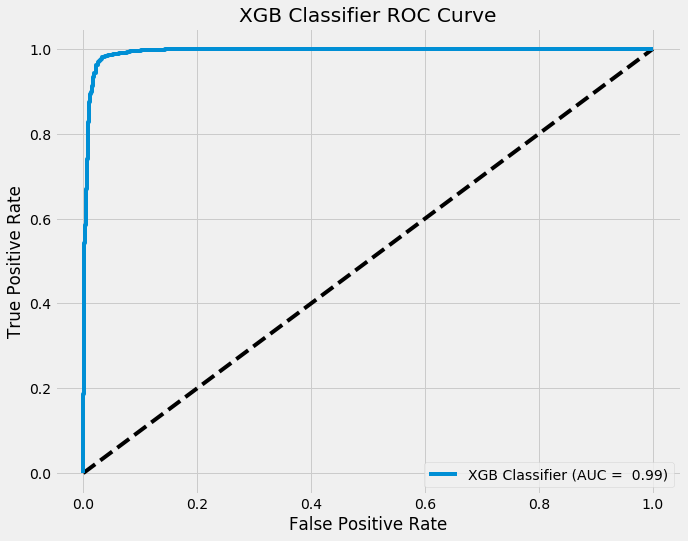

In [33]:
# set figsize
figsize(10,8)

# plot styple
plt.style.use('fivethirtyeight')

# plot roc
ROC.plot_roc()

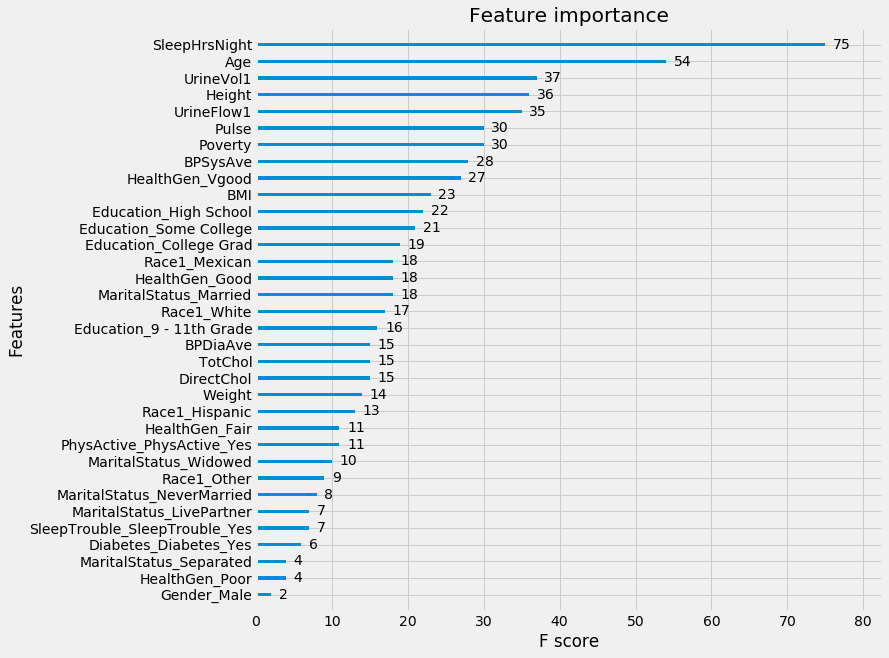

In [34]:
# set figsize
figsize(10,10)

# plot styple
plt.style.use('fivethirtyeight')

# plot feature importance
xgb.plot_importance(xgb_cl)